In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'fac_meank']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_10',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_2__2__6',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.5__all.5__all0',
                          'bigsum',
                          'mdc_0501_792d11',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_10',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_2__2__6',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.5__all.5__all0',
                          'bigsum',
                          'mdc_0501_792d11',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 10 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

ng = 10

nref = 3

p_refs = (/ 1,  10, 500 /)

t_refs = (/ 250, 250, 250 /)

ng_refs = (/ 2,   2,   6 /)

data wgt
     &     /6*0, 4*.5/

planck_wgt_flux = 2

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

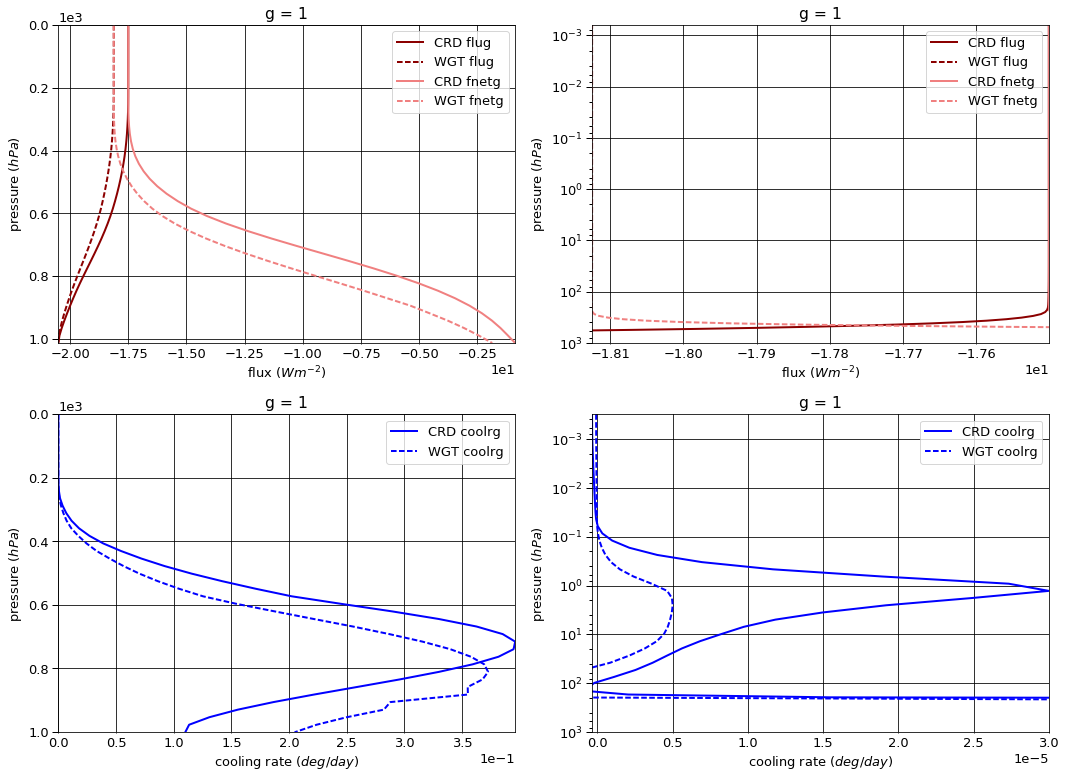

# Figure: flux, cooling rate g-group 2

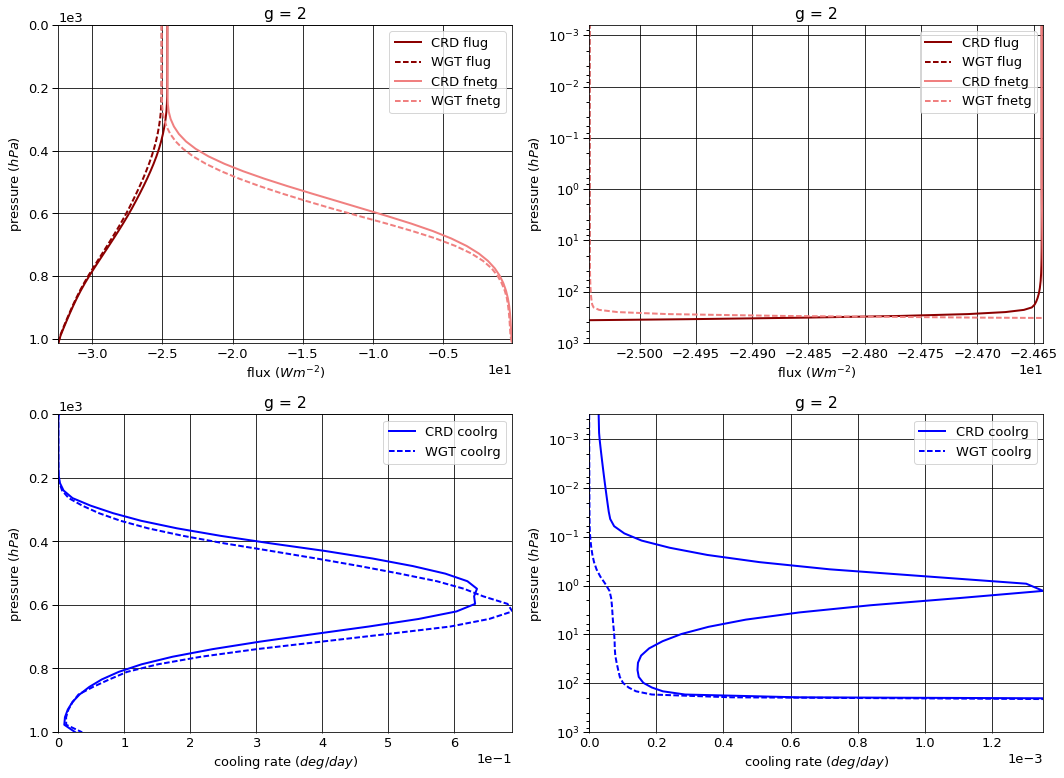

# Figure: flux, cooling rate g-group 3

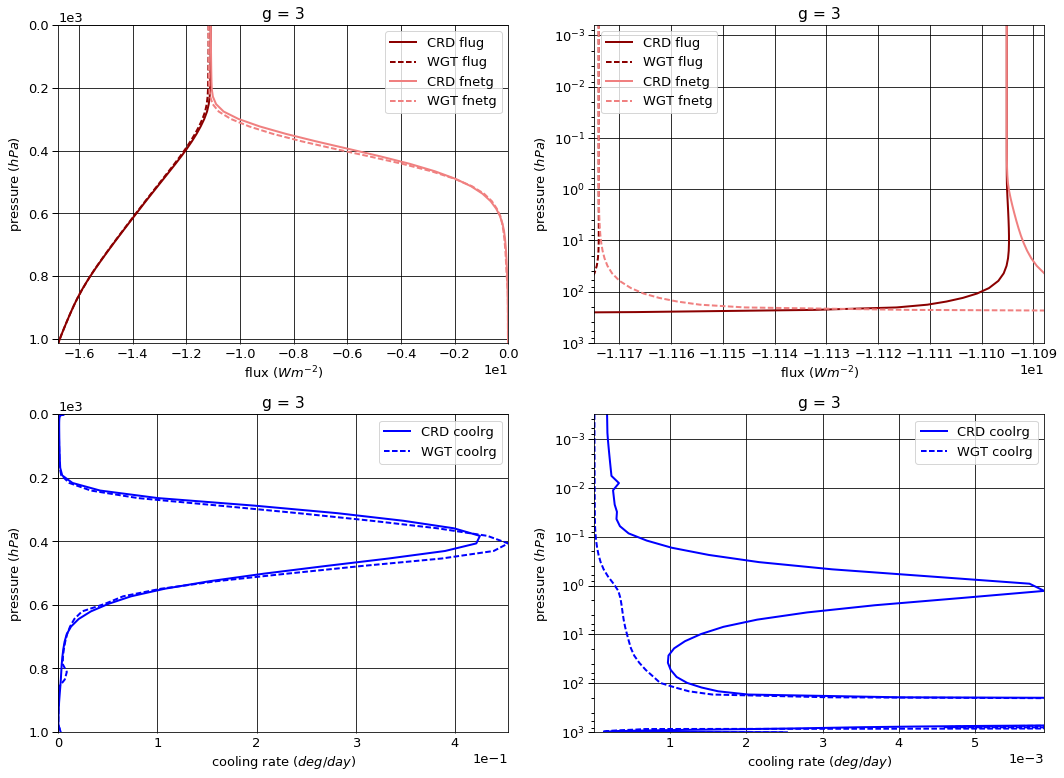

# Figure: flux, cooling rate g-group 4

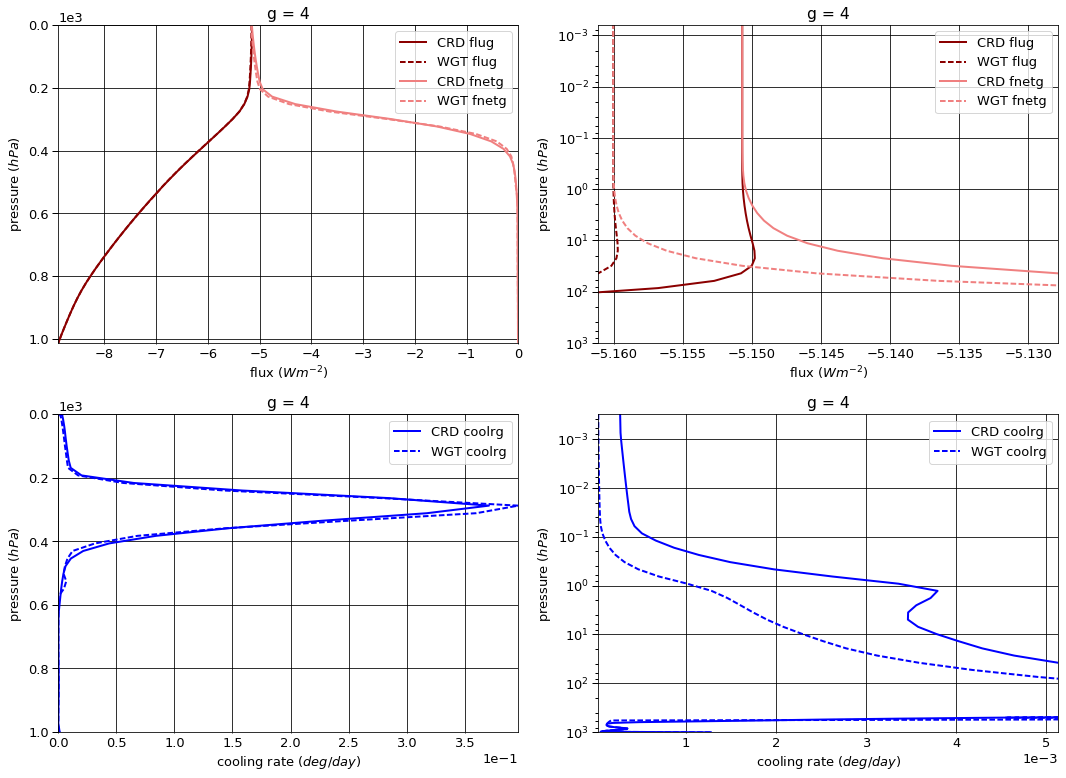

# Figure: flux, cooling rate g-group 5

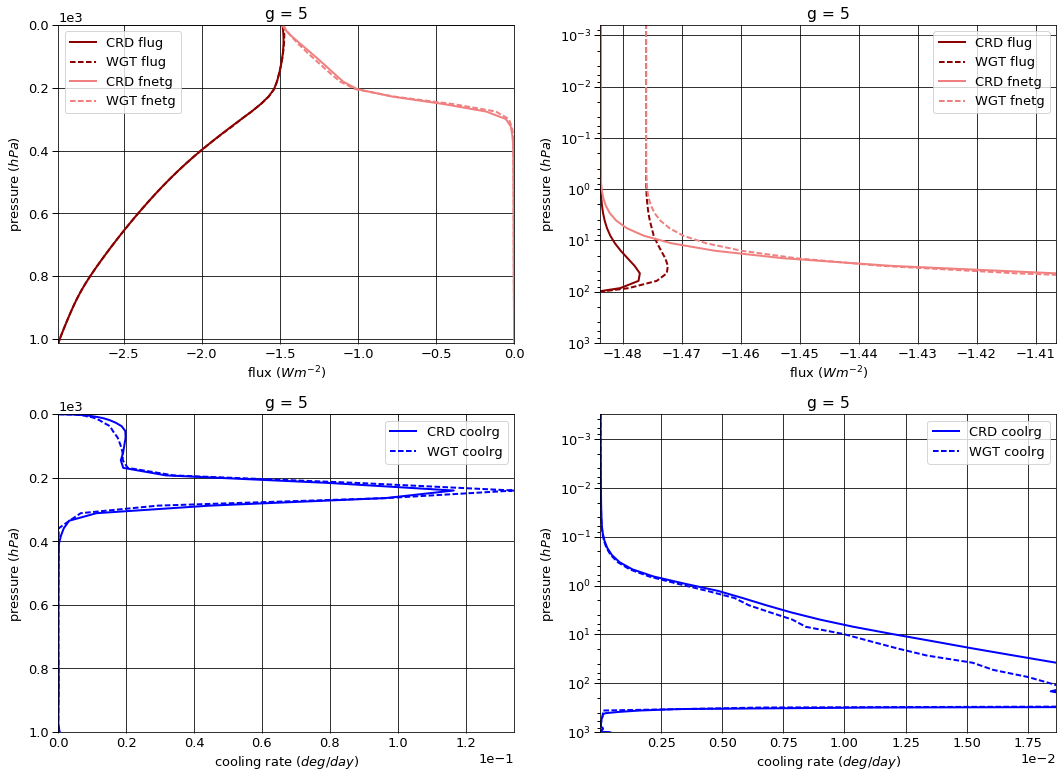

# Figure: flux, cooling rate g-group 6

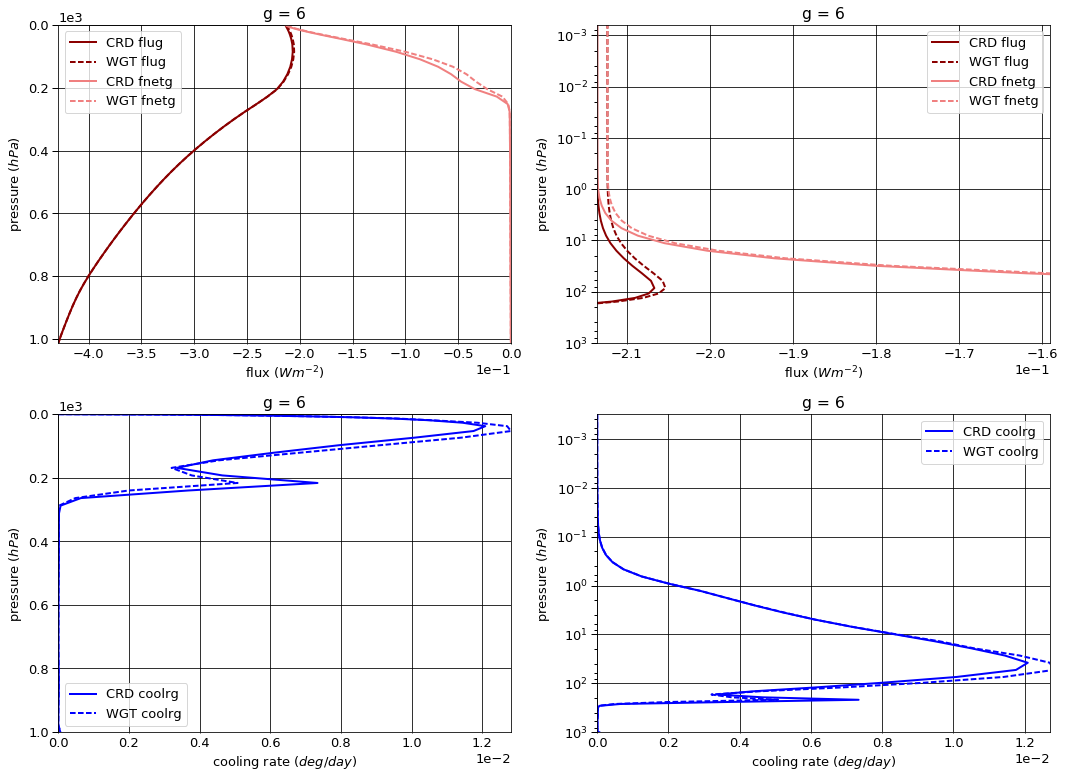

# Figure: flux, cooling rate g-group 7

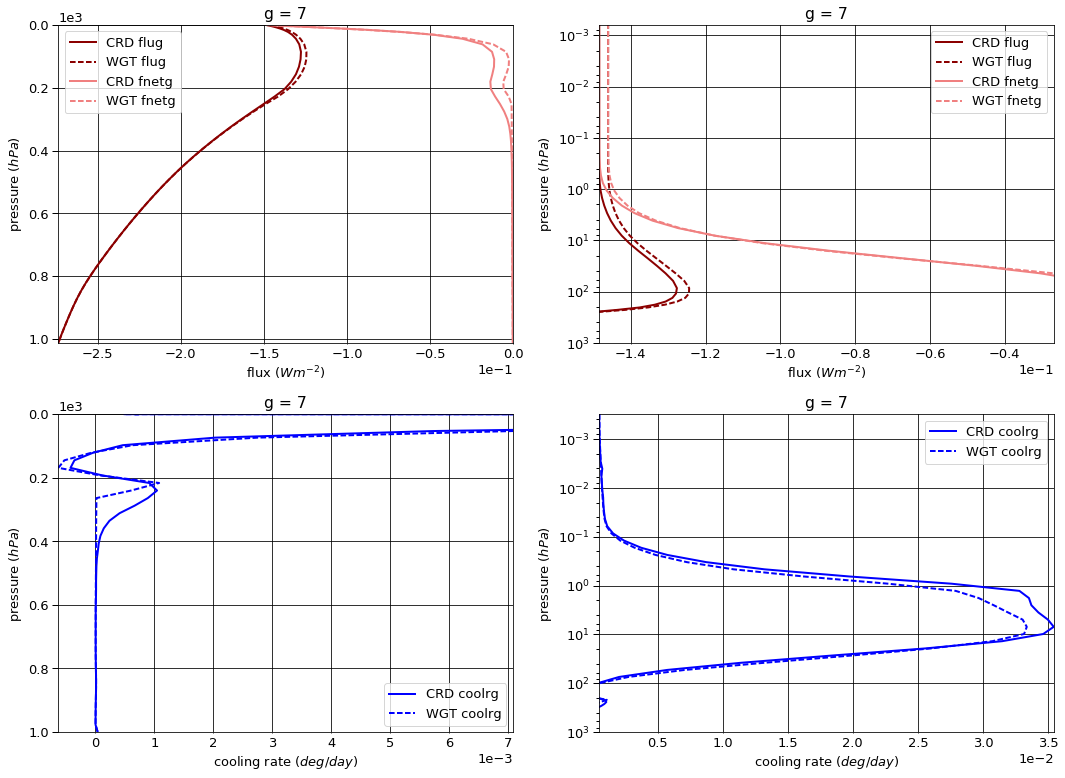

# Figure: flux, cooling rate g-group 8

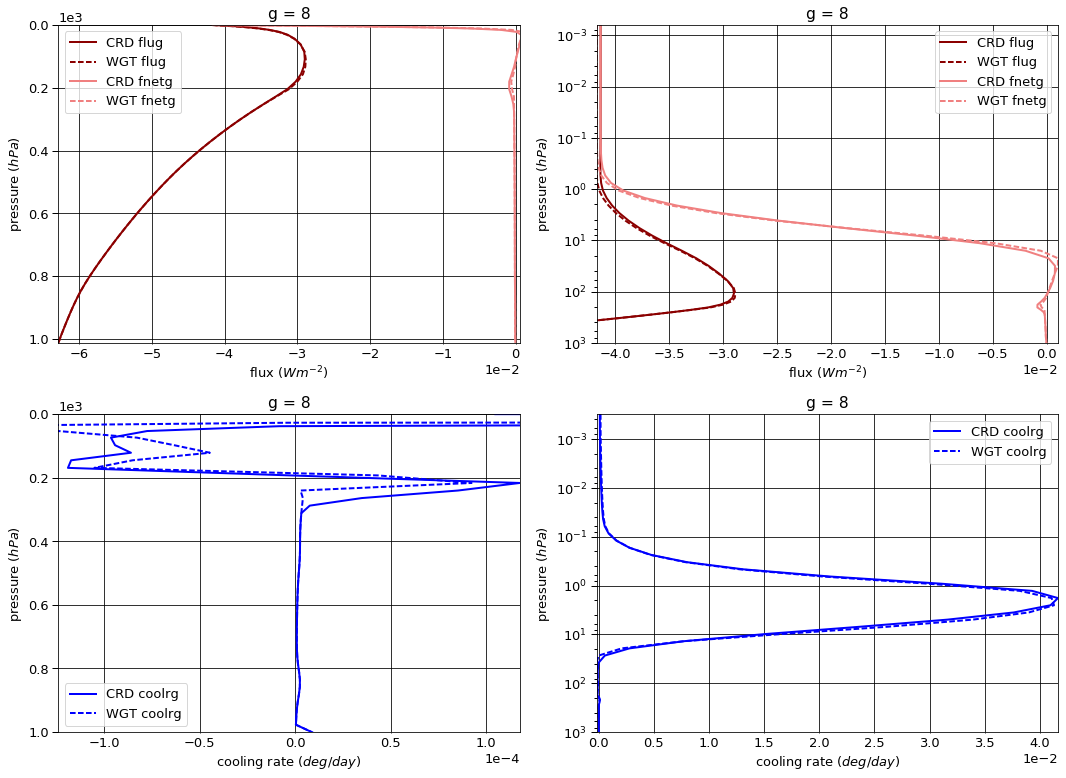

# Figure: flux, cooling rate g-group 9

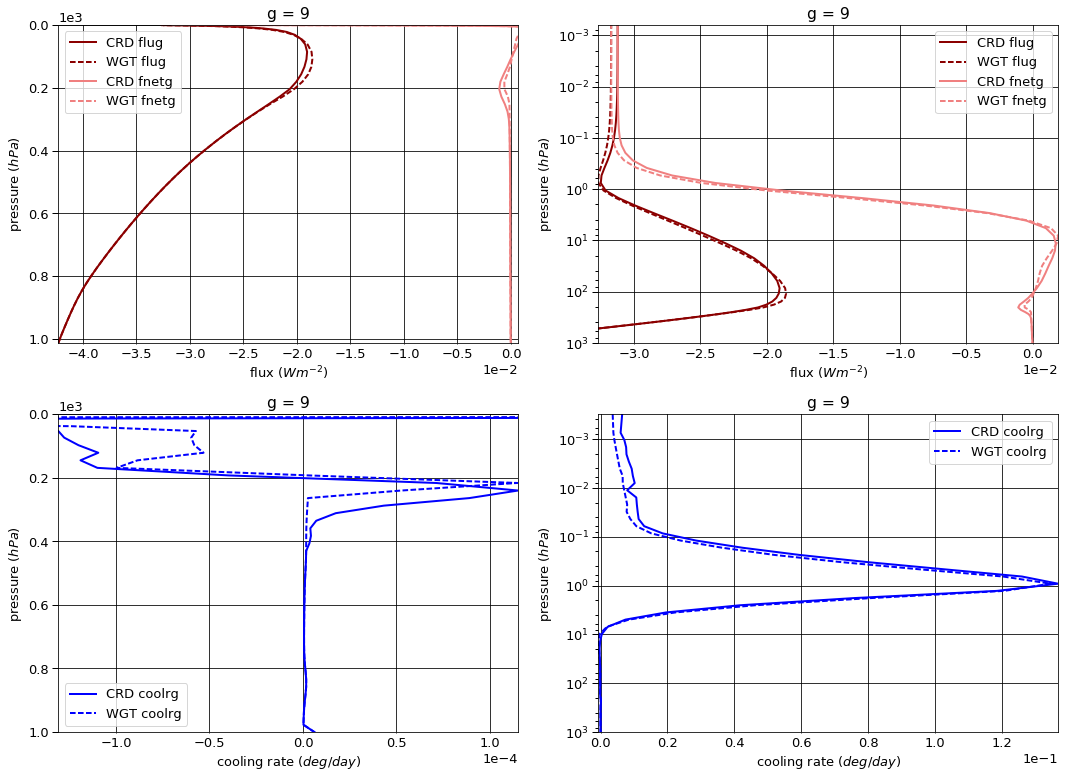

# Figure: flux, cooling rate g-group 10

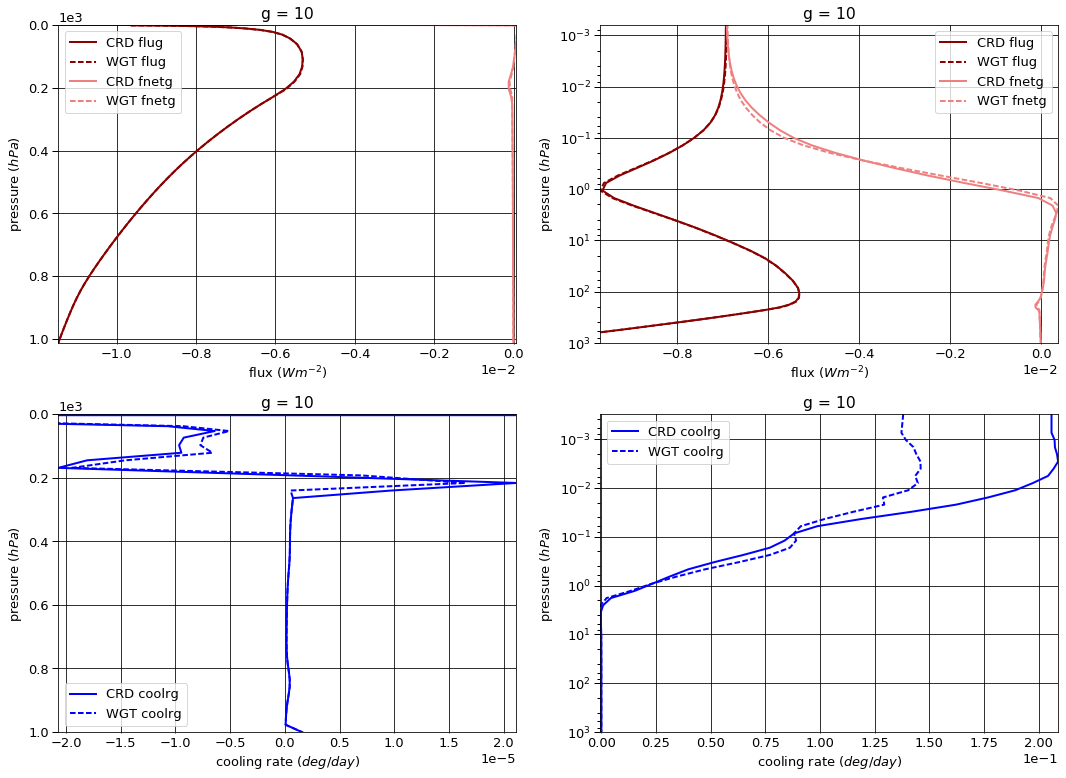

# Figure: flux, cooling rate g-group total

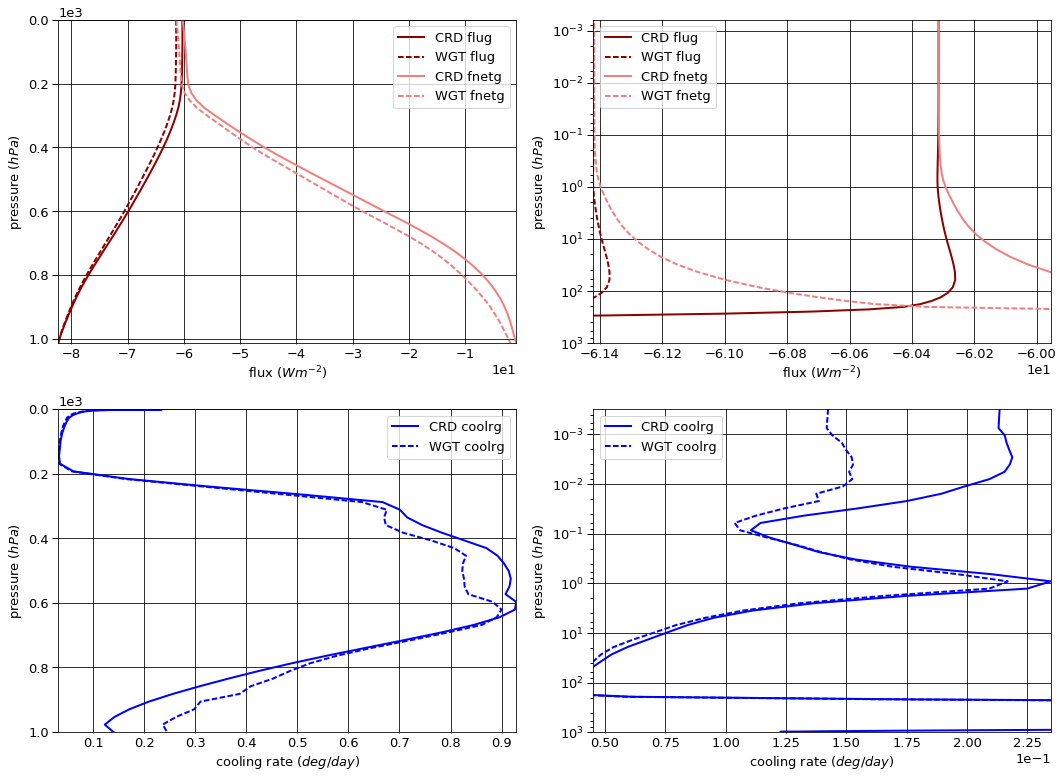

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g  pressure level                                 
1  0.0      1     -17.500894   0.000000 -17.500894
   1013.0   76    -20.507278  19.632284  -0.874994
2  0.0      1     -24.642797   0.000000 -24.642797
   1013.0   76    -32.405981  32.332471  -0.073510
3  0.0      1     -11.095159   0.000000 -11.095159
   1013.0   76    -16.773507  16.766577  -0.006930
4  0.0      1      -5.150715   0.000000  -5.150715
   1013.0   76     -8.892319   8.888777  -0.003542
5  0.0      1      -1.483736   0.000000  -1.483736
   1013.0   76     -2.917730   2.916565  -0.001165
6  0.0      1      -0.213567   0.000000  -0.213567
   1013.0   76     -0.428591   0.428429  -0.000163
7  0.0      1      -0.148463   0.000000  -0.148463
   1013.0   76     -0.273751   0.273641  -0.000109
8  0.0      1      -0.041330   0.000000  -0.041330
   1013.0   76     -0.062875   0.062850  -0.000025
9  0.0      1      -0.031230   0.000000  -0.031230
   1013.0   76     -0.042295   0.042277  -0.000017
10 0.0      1      -0.006920   0.000000  -0.006920
   1013.0   76     -0.011469   0.011464  -0.000004


WGT


flug       fldg      fnetg
g  pressure level                                 
1  0.0      1     -18.124724   0.000000 -18.124724
   1013.0   76    -20.507278  18.646224  -1.861054
2  0.0      1     -25.044456   0.000000 -25.044456
   1013.0   76    -32.405981  32.301289  -0.104691
3  0.0      1     -11.174006   0.000000 -11.174006
   1013.0   76    -16.773507  16.766638  -0.006869
4  0.0      1      -5.160054   0.000000  -5.160054
   1013.0   76     -8.892319   8.888777  -0.003542
5  0.0      1      -1.476017   0.000000  -1.476017
   1013.0   76     -2.917730   2.916565  -0.001165
6  0.0      1      -0.212337   0.000000  -0.212337
   1013.0   76     -0.428591   0.428429  -0.000163
7  0.0      1      -0.146083   0.000000  -0.146083
   1013.0   76     -0.273751   0.273641  -0.000109
8  0.0      1      -0.041689   0.000000  -0.041689
   1013.0   76     -0.062875   0.062850  -0.000025
9  0.0      1      -0.031717   0.000000  -0.031717
   1013.0   76     -0.042295   0.042277  -0.000017
10 0.0      1      -0.006902   0.000000  -0.006902
   1013.0   76     -0.011469   0.011464  -0.000004


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.623830  0.000000 -0.623830
   1013.0   76     0.000000 -0.986060 -0.986060
2  0.0      1     -0.401659  0.000000 -0.401659
   1013.0   76     0.000000 -0.031182 -0.031182
3  0.0      1     -0.078847  0.000000 -0.078847
   1013.0   76     0.000000  0.000061  0.000061
4  0.0      1     -0.009338  0.000000 -0.009338
   1013.0   76     0.000000  0.000000  0.000000
5  0.0      1      0.007720  0.000000  0.007720
   1013.0   76     0.000000  0.000000  0.000000
6  0.0      1      0.001230  0.000000  0.001230
   1013.0   76     0.000000  0.000000  0.000000
7  0.0      1      0.002380  0.000000  0.002380
   1013.0   76     0.000000  0.000000  0.000000
8  0.0      1     -0.000359  0.000000 -0.000359
   1013.0   76     0.000000  0.000000  0.000000
9  0.0      1     -0.000487  0.000000 -0.000487
   1013.0   76     0.000000  0.000000  0.000000
10 0.0      1      0.000019  0.000000  0.000019
   1013.0   76     0.000000  0.000000  0.000000

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -3.613013e-07
   1001.112500 75     1.099830e-01
2  0.000312    1      2.855505e-05
   1001.112500 75     2.586630e-02
3  0.000312    1      1.734340e-04
   1001.112500 75     2.532523e-03
4  0.000312    1      2.738165e-04
   1001.112500 75     1.279405e-03
5  0.000312    1      2.649066e-05
   1001.112500 75     4.207021e-04
6  0.000312    1      3.237353e-07
   1001.112500 75     5.878932e-05
7  0.000312    1      4.946953e-04
   1001.112500 75     3.952667e-05
8  0.000312    1      1.049341e-04
   1001.112500 75     8.922717e-06
9  0.000312    1      6.472078e-03
   1001.112500 75     6.314364e-06
10 0.000312    1      2.059069e-01
   1001.112500 75     1.605736e-06


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -8.794770e-08
   1001.112500 75     2.047248e-01
2  0.000312    1      3.525593e-07
   1001.112500 75     3.619929e-02
3  0.000312    1      7.856573e-06
   1001.112500 75     2.481255e-03
4  0.000312    1      3.153889e-05
   1001.112500 75     1.279405e-03
5  0.000312    1      2.120035e-05
   1001.112500 75     4.207021e-04
6  0.000312    1      3.382621e-07
   1001.112500 75     5.878932e-05
7  0.000312    1      5.141723e-04
   1001.112500 75     3.952667e-05
8  0.000312    1      1.699773e-04
   1001.112500 75     8.922717e-06
9  0.000312    1      3.636068e-03
   1001.112500 75     6.314364e-06
10 0.000312    1      1.380784e-01
   1001.112500 75     1.605736e-06


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      2.733536e-07
   1001.112500 75     9.474175e-02
2  0.000312    1     -2.820249e-05
   1001.112500 75     1.033299e-02
3  0.000312    1     -1.655774e-04
   1001.112500 75    -5.126830e-05
4  0.000312    1     -2.422776e-04
   1001.112500 75     0.000000e+00
5  0.000312    1     -5.290302e-06
   1001.112500 75     0.000000e+00
6  0.000312    1      1.452686e-08
   1001.112500 75     0.000000e+00
7  0.000312    1      1.947704e-05
   1001.112500 75     0.000000e+00
8  0.000312    1      6.504328e-05
   1001.112500 75     0.000000e+00
9  0.000312    1     -2.836010e-03
   1001.112500 75     0.000000e+00
10 0.000312    1     -6.782853e-02
   1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.314812,0.000000,-60.314812
1013.0,76,-82.315795,81.355336,-0.960459



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-61.417984,0.000000,-61.417984
1013.0,76,-82.315795,80.338155,-1.977640



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-1.103172,0.000000,-1.103172
1013.0,76,0.000000,-1.017181,-1.017181


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213481
1001.112500,75,0.140197



WGT


,,coolrg
pressure,layer,
0.000312,1,0.142460
1001.112500,75,0.245221



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.071021
1001.112500,75,0.105023


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.234825,0.240966
2,0.390375,0.393311
3,0.211525,0.207564
4,0.114900,0.111319
5,0.037575,0.036493
6,0.005775,0.005468
7,0.003525,0.003422
8,0.000825,0.000792
9,0.000525,0.000521


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,3.978790e-24
2,3.277820e-23
3,2.700344e-22
4,2.224606e-21
5,1.832682e-20
6,1.509806e-19
7,4.626733e-20
8,4.227122e-19
9,5.623149e-19


In [21]:
def spreadsheet():
    ng = 10
    ng_refs = [2, 2, 6]
    p_refs = [1, 10, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,3.978790e-24,NaN,0.234825,0.240966,0.234825,0.240966,500.0
2,3.277820e-23,NaN,0.390375,0.393311,0.625200,0.634277,500.0
3,2.700344e-22,8.238232,0.211525,0.207564,0.836725,0.841841,500.0
4,2.224606e-21,8.238231,0.114900,0.111319,0.951625,0.953160,500.0
5,1.832682e-20,8.238232,0.037575,0.036493,0.989200,0.989653,500.0
6,1.509806e-19,8.238232,0.005775,0.005468,0.994975,0.995120,500.0
7,4.626733e-20,0.306446,0.003525,0.003422,0.998500,0.998542,10.0
8,4.227122e-19,9.136299,0.000825,0.000792,0.999325,0.999334,10.0
9,5.623149e-19,1.330255,0.000525,0.000521,0.999850,0.999855,1.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

In [24]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')